**Municipios de colombia mas afectados por el Covid-19, al pasar de los dias.**

In [0]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
dataset = pd.read_csv("Casos4.csv")

In [4]:
dataset.head(5)

,ID de caso,Fecha de diagnóstico,Ciudad de ubicación,Departamento,Atención,Edad,Sexo,Tipo*,País de procedencia
0,1,06/03/2020,Bogotá,Bogotá,Recuperado,10 a 19,F,Importado,Italia
1,2,09/03/2020,Buga,Valle,Recuperado,30 a 39,M,Importado,España
2,3,09/03/2020,Medellín,Antioquia,Recuperado,50 a 59,F,Importado,España
3,4,11/03/2020,Medellín,Antioquia,En casa,50 a 59,M,Relacionado,Colombia
4,5,11/03/2020,Medellín,Antioquia,Recuperado,20 a 29,M,Relacionado,Colombia


In [0]:
dataset = dataset.rename(columns={'Ciudad de ubicación':'Ciudad_de_ubicación'})

In [0]:
dataset['Dia'] = dataset['Fecha de diagnóstico']

In [0]:

dataset.Ciudad_de_ubicación = dataset.Ciudad_de_ubicación.replace({'Bogota':'Bogotá','Cucuta':'Cúcuta'})

In [8]:
dataset.Dia = dataset.Dia.replace({'06/03/2020':6, '09/03/2020':9,'11/03/2020':11,'12/03/2020':12,'13/03/2020':13,'14/03/2020':14,'15/03/2020':15,'16/03/2020':16,'17/03/2020':17,
                                                       '18/03/2020':18,'19/03/2020':19,'20/03/2020':20,'21/03/2020':21, '22/03/2020':22,'23/03/2020':23 ,'24/03/2020':24,
                                                        '25/03/2020':25, '26/03/2020':26,'27/3/2020':27,'28/3/2020':28})

dataset['Dia'].unique()

array([ 6,  9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28])

In [9]:
dataset['Fecha de diagnóstico'].unique()

array(['06/03/2020', '09/03/2020', '11/03/2020', '12/03/2020',
       '13/03/2020', '14/03/2020', '15/03/2020', '16/03/2020',
       '17/03/2020', '18/03/2020', '19/03/2020', '20/03/2020',
       '21/03/2020', '22/03/2020', '23/03/2020', '24/03/2020',
       '25/03/2020', '26/03/2020', '27/3/2020', '28/3/2020'], dtype=object)

In [10]:
dataset['Ciudad_de_ubicación'].unique()

array(['Bogotá', 'Buga', 'Medellín', 'Itagüí', 'Cartagena', 'Neiva',
       'Palmira', 'Villavicencio', 'Rionegro', 'Cali', 'Dosquebradas',
       'Cúcuta', 'Manizales', 'Subachoque', 'Soacha', 'Barranquilla',
       'Bucaramanga', 'Armenia', 'Pereira', 'Cajicá', 'Tolima', 'Ibagué',
       'Popayán', 'Viterbo', 'Anapoima', 'Envigado', 'Santa Marta',
       'Chía', 'Madrid', 'Villa del Rosario', 'Guarne', 'Calarcá',
       'Valledupar', 'La Dorada', 'Chinchiná', 'San Andrés Islas',
       'Yumbo', 'Yopal', 'Guatapé', 'Bello', 'Barbosa', 'Cota',
       'Sabaneta', 'Villamaría', 'Trujillo', 'Pacho', 'El Retiro',
       'Apartado', 'Ipiales', 'Mosquera', 'La Unión', 'Cartago',
       'Fusagasugá', 'La Calera', 'Villeta', 'Palermo', 'San Pedro',
       'Darién', 'Funza', 'Tuluá', 'Soledad', 'El Dovio', 'Santana',
       'Frontino', 'Tunja', 'Puerto Colombia', 'Pasto', 'Polonuevo',
       'Montebello', 'Chinchina', 'Santa Rosa de Oso', 'Turbaco'],
      dtype=object)

In [0]:
dataset['numero_ciudad'] = dataset['Ciudad_de_ubicación']

In [0]:
dataset['numero_ciudad'] = pd.factorize(dataset['numero_ciudad'])[0]

In [13]:
dataset.head(10)

,ID de caso,Fecha de diagnóstico,Ciudad_de_ubicación,Departamento,Atención,Edad,Sexo,Tipo*,País de procedencia,Dia,numero_ciudad
0,1,06/03/2020,Bogotá,Bogotá,Recuperado,10 a 19,F,Importado,Italia,6,0
1,2,09/03/2020,Buga,Valle,Recuperado,30 a 39,M,Importado,España,9,1
2,3,09/03/2020,Medellín,Antioquia,Recuperado,50 a 59,F,Importado,España,9,2
3,4,11/03/2020,Medellín,Antioquia,En casa,50 a 59,M,Relacionado,Colombia,11,2
4,5,11/03/2020,Medellín,Antioquia,Recuperado,20 a 29,M,Relacionado,Colombia,11,2
5,6,11/03/2020,Itagüí,Antioquia,En casa,20 a 29,F,Relacionado,Colombia,11,3
6,7,11/03/2020,Cartagena,Cartagena,Recuperado,80 a 89,F,Importado,Estados Unidos,11,4
7,8,11/03/2020,Bogotá,Bogotá,Recuperado,20 a 29,F,Importado,España,11,0
8,9,11/03/2020,Bogotá,Bogotá,Recuperado,20 a 29,F,Importado,España-Italia,11,0
9,10,12/03/2020,Bogotá,Bogotá,En casa,30 a 39,F,Importado,España,12,0


In [14]:
dataset.shape

(608, 11)

In [0]:
def estimate_bo_b1(x, y):
    
    n = np.size(x)
    
    #Obtenemos los promedios de X y de y
    m_x, m_y = np.mean(x), np.mean(y)
    
    #Calcular sumatoria de XY y mi sumatoria de XX
    Sumatoria_xy = np.sum((x-m_x)*(y-m_y))
    Sumatoria_xx = np.sum(x*(x-m_x))
    
    #coeficiente de regresion
    b_1 = Sumatoria_xy / Sumatoria_xx
    b_0 = m_y - b_1*m_x
    
    return (b_0 , b_1)

In [0]:
def plot_regression(x,y,b):
    plt.scatter(x , y , color = 'green', marker = 'o', s=30)
    
    y_pred= b[0] + b[1]*x
    plt.plot(x, y_pred, color = 'blue')
    
    plt.xlabel('Dias Covid-19')
    plt.ylabel('Municipios con casos de Covid-19')
    plt.title('28/03/2020 Colombia')
    plt.gca().legend(('Ajuste de datos','Casos registrados'))
    plt.savefig('imagen.png', transparent=True)
    #plt.xticks(np.arange(28))
    
    plt.show()

Los valores b0 = -0.8991255069777253, b1 =0.4525881116728138


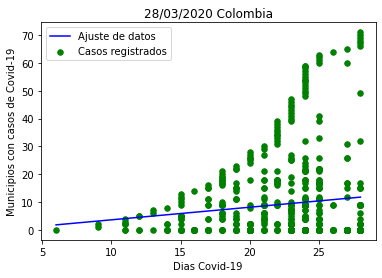

In [17]:
def main():
    
    x = dataset['Dia']
    y = dataset['numero_ciudad']
    b = estimate_bo_b1(x,y)
    print(f'Los valores b0 = {b[0]}, b1 ={b[1]}')
    
    plot_regression(x, y, b)

    
    
if __name__ == '__main__':
    main()

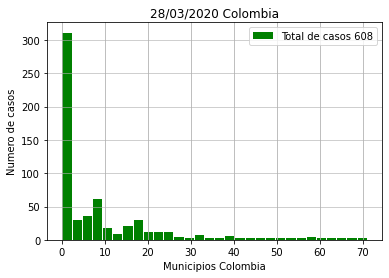

In [18]:
dataset['numero_ciudad'].hist(grid=True, bins=30, rwidth=0.9,
                   color='green')
plt.title('28/03/2020 Colombia')
plt.xlabel('Municipios Colombia')
plt.ylabel('Numero de casos')
plt.grid(axis='y', alpha=0.75)
plt.gca().legend(('Total de casos 608','Casos registrados'))
plt.savefig('hist1.png',transparent=True)

In [0]:
valores_numero_ciudad= pd.DataFrame(dataset['numero_ciudad'].unique())
valores_ciudad_ubicación= pd.DataFrame(dataset['Ciudad_de_ubicación'].unique())

valores_numero_ciudad.rename(columns={0: 'Numero asignado ciudad'}, inplace=True)
valores_ciudad_ubicación.rename(columns={0: 'Ciudad de ubicación'}, inplace=True)


representacion_ciudad_ubicacion = pd.concat([valores_numero_ciudad, valores_ciudad_ubicación],axis=1)

In [20]:

representacion_ciudad_ubicacion.head(70)


,Numero asignado ciudad,Ciudad de ubicación
0,0,Bogotá
1,1,Buga
2,2,Medellín
3,3,Itagüí
4,4,Cartagena
...,...,...
65,65,Puerto Colombia
66,66,Pasto
67,67,Polonuevo
68,68,Montebello


In [21]:
dataset['Ciudad_de_ubicación'].value_counts()

Bogotá          264
Cali             59
Medellín         46
Cartagena        27
Barranquilla     16
               ... 
Guarne            1
Tolima            1
Frontino          1
Trujillo          1
Guatapé           1
Name: Ciudad_de_ubicación, Length: 72, dtype: int64